<a href="https://colab.research.google.com/github/RodrickGulu/Final_Year_Project/blob/main/training_model_with_blurry_image_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pandas as pd

In [ ]:
def load_images_from_folder1(folder_path):
    images = []
    labels = []

    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])

    for folder_name in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder_name)
        if not os.path.isdir(folder):
            continue

        label = 1 if folder_name == "glaucoma" or folder_name == "glucoma" or folder_name=="Glaucoma_Positive" else 0

        for filename in tqdm(os.listdir(folder), desc=f"Loading images", total=total_files):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            if img is not None:
                images.append(img)
                labels.append(label)

    return images, labels

def print_image_characteristics(images, labels):
    print("Number of images:", len(images))
    if len(images) > 0:
      print("Number of Healthy images:", np.count_nonzero(np.array(labels) == 0))
      print("Number of Glaucomatous images:", np.count_nonzero(np.array(labels) == 1))
      print("Image dimensions:", images[0].shape)
      print("Data type:", images[0].dtype)
      print("Range of pixel values:", np.min(images), "-", np.max(images))

# Load images from folder
images_folder_path = '/content/drive/MyDrive/G1020'
images, labels = load_images_from_folder1(images_folder_path)

print_image_characteristics(images, labels)

Loading images:  27%|██▋       | 284/1041 [00:05<00:13, 54.91it/s] 


Number of images: 1041
Number of Healthy images: 757
Number of Glaucomatous images: 284
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


In [ ]:
def load_images_from_folder(folder_path):
    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])

    for folder_name in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder_name)
        if not os.path.isdir(folder):
            continue

        label = 1 if folder_name == "glaucoma" or folder_name == "glucoma" or folder_name=="Glaucoma_Positive" else 0

        for filename in tqdm(os.listdir(folder), desc=f"Loading images", total=total_files):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            if img is not None:
                images.append(img)
                labels.append(label)

    return images, labels

# Load images from the folder
images_folder_path = '/content/drive/MyDrive/RIM-ONE_DL_images/partitioned_randomly/training_set'
images, labels = load_images_from_folder(images_folder_path)

print_image_characteristics(images, labels)

Loading images:  65%|██████▍   | 219/339 [00:09<00:05, 22.72it/s]


Number of images: 1380
Number of Healthy images: 976
Number of Glaucomatous images: 404
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


In [ ]:
# Load images from the folder
images_folder_path = '/content/drive/MyDrive/RIM-ONE_DL_images/partitioned_randomly/test_set'
images, labels = load_images_from_folder(images_folder_path)

print_image_characteristics(images, labels)

Loading images:  64%|██████▍   | 94/146 [00:47<00:26,  1.99it/s]


Number of images: 1526
Number of Healthy images: 1070
Number of Glaucomatous images: 456
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


In [ ]:
# Load images from the folder
images_folder_path = '/content/drive/MyDrive/archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
images, labels = load_images_from_folder(images_folder_path)

print_image_characteristics(images, labels)

Loading images:  74%|███████▍  | 386/520 [00:48<00:16,  8.04it/s]


Number of images: 2046
Number of Healthy images: 1456
Number of Glaucomatous images: 590
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


In [ ]:
# Load images from the folder
images_folder_path = '/content/drive/MyDrive/archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'
images, labels = load_images_from_folder(images_folder_path)

print_image_characteristics(images, labels)

Loading images:  74%|███████▍  | 96/130 [01:02<00:22,  1.54it/s]


Number of images: 2176
Number of Healthy images: 1552
Number of Glaucomatous images: 624
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


In [ ]:
# Function to load images from a folder and assign all labels as 1
def load_images_from_folder(folder_path):
    # Get total number of files for progress bar
    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])

    # Iterate over all files in the folder
    for folder_name in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder_name)
        if not os.path.isdir(folder):
            continue

        # Assign label 1 to all images
        label = 0

        # Load images and resize them
        for filename in tqdm(os.listdir(folder), desc=f"Loading images from {folder_name}", total=total_files):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                images.append(img)
                labels.append(label)

    return images, labels

# Load images from the specified folder
images_folder_path = '/content/drive/MyDrive/LAG_database_part_1/non_glaucoma'
images, labels = load_images_from_folder(images_folder_path)

# Print image characteristics
print_image_characteristics(images, labels)


Loading images from image: 100%|██████████| 3143/3143 [01:54<00:00, 27.49it/s]


Number of images: 5319
Number of Healthy images: 4695
Number of Glaucomatous images: 624
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


In [ ]:
# Function to load images from a folder and assign all labels as 1
def load_images_from_folder(folder_path):
    # Get total number of files for progress bar
    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])

    # Iterate over all files in the folder
    for folder_name in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder_name)
        if not os.path.isdir(folder):
            continue

        # Assign label 1 to all images
        label = 1

        # Load images and resize them
        for filename in tqdm(os.listdir(folder), desc=f"Loading images from {folder_name}", total=total_files):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                images.append(img)
                labels.append(label)

    return images, labels

# Load images from the specified folder
images_folder_path = '/content/drive/MyDrive/LAG_database_part_1/suspicious_glaucoma'
images, labels = load_images_from_folder(images_folder_path)

# Print image characteristics
print_image_characteristics(images, labels)

Loading images from image: 100%|██████████| 1711/1711 [01:00<00:00, 28.51it/s]


Number of images: 7030
Number of Healthy images: 4695
Number of Glaucomatous images: 2335
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


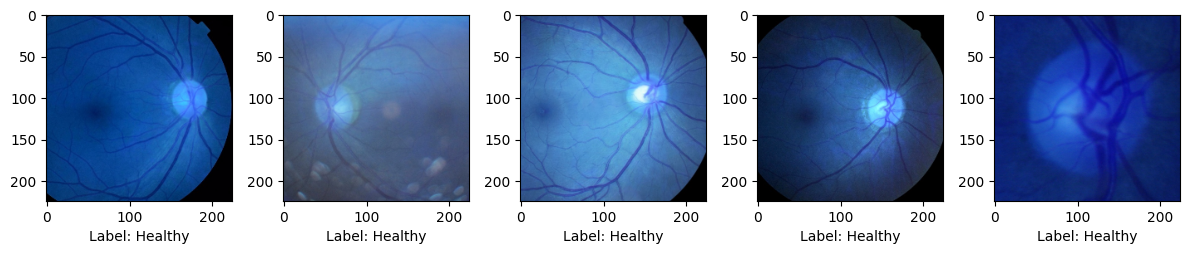

In [ ]:
def plot_images(images, labels):
  plt.figure(figsize=(12,7))
  for i in range(5):
      sample = random.choice(range(len(images)))
      image = images[sample]
      categ = labels[sample]

      label = "Glaucomatous" if categ==1 else "Healthy"

      plt.subplot(2, 5, i + 1)
      plt.imshow(image)
      plt.xlabel(f"Label: {label}")

  plt.tight_layout()
  plt.show()

plot_images(images, labels)

Applying blur threshold: 100%|██████████| 7030/7030 [00:00<00:00, 17986.71it/s]


Number of images: 7030
Number of Healthy images: 4695
Number of Glaucomatous images: 2335
Image dimensions: (224, 224, 3)
Data type: uint8
Range of pixel values: 0 - 255


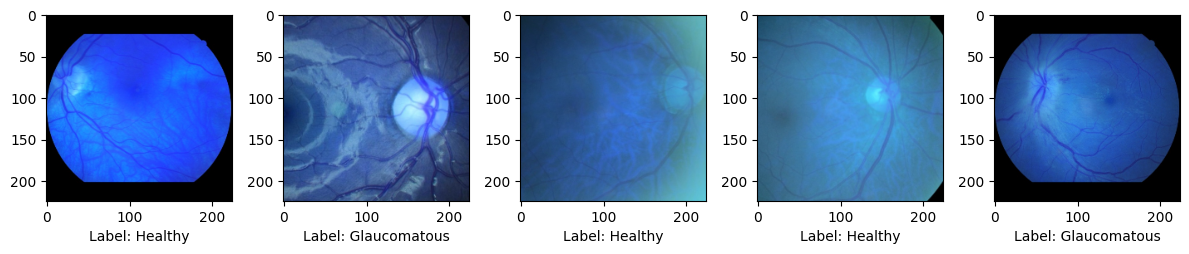

In [ ]:
def apply_laplacian_method(image):
    img = cv2.resize(image, (14, 14))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.Laplacian(gray, cv2.CV_64F).var()
    return blur

def apply_laplacian_threshold(images, labels, threshold):
    filtered_images = []
    filtered_labels = []

    for i in tqdm(range(len(images)), desc="Applying blur threshold"):
        blur = apply_laplacian_method(images[i])
        if blur > threshold:
            filtered_images.append(images[i])
            filtered_labels.append(labels[i])

    return np.array(filtered_images), np.array(filtered_labels)

threshold=50
filtered_images, filtered_labels = apply_laplacian_threshold(images, labels, threshold)
print_image_characteristics(filtered_images, filtered_labels)
plot_images(filtered_images, filtered_labels,)

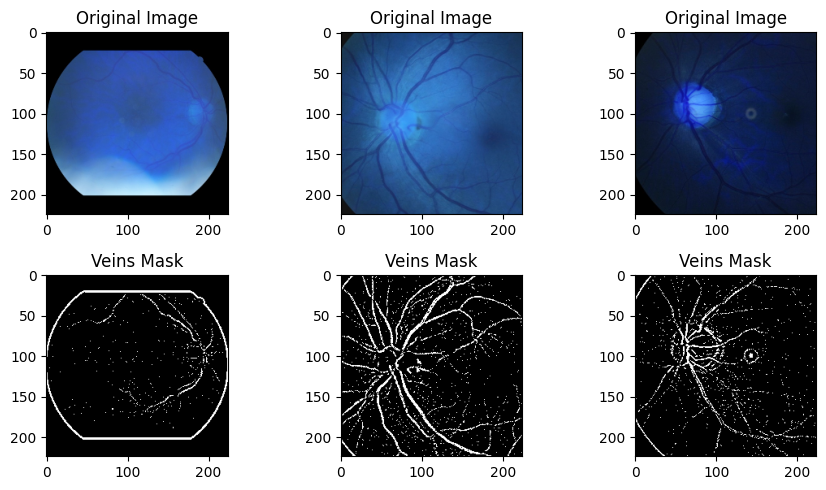

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk, binary_erosion, binary_dilation

def preprocess_image(image_path):
  masks=[]
  preprocessed_images=[]

  for img in image_path:
    # Read the image
    img_color = img
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (3, 3), 0)

    # Enhance veins using a high-pass filter (Laplacian)
    laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)

    # Threshold the image to capture veins
    _, veins_mask = cv2.threshold(laplacian, 3, 255, cv2.THRESH_BINARY)

     # Convert veins mask to binary (0 and 1)
    binary_veins_mask = (veins_mask / 255).astype(np.uint8)

    # Apply morphological operations to remove single dots
    kernel = np.ones((1, 1), np.uint8)
    binary_veins_mask = cv2.morphologyEx(binary_veins_mask, cv2.MORPH_CLOSE, kernel)
    masks.append(binary_veins_mask)

    veins_mask_rgb = np.stack([binary_veins_mask] * 3, axis=-1)

    # Overlay veins mask on the original image
    preprocessed_image = img_color.copy()
    preprocessed_image[veins_mask_rgb == 1] = 255

    preprocessed_images.append(preprocessed_image)

  return np.array(masks), np.array(preprocessed_images)


def plot_images_masks(images, veins_mask, preprocessed_images, labels):
    plt.figure(figsize=(15, 5))
    for i in range(3):
        sample = random.choice(range(len(images)))
        image = images[sample]
        mask = veins_mask[sample]
        pre_image = preprocessed_images[sample]
        category = labels[sample]

        label = 'Glaucomatous' if category == 1 else 'Healthy'

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')

        plt.subplot(2, 5, i + 6)
        plt.imshow(mask, cmap='gray')
        plt.title('Veins Mask')

    plt.tight_layout()
    plt.show()


image_path = filtered_images
label= filtered_labels

veins_mask, preprocessed_images = preprocess_image(image_path)
plot_images_masks(filtered_images, veins_mask, preprocessed_images, filtered_labels)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import cv2
from tqdm import tqdm

# Load VGG19 model pretrained on ImageNet
base_model = VGG19(weights='imagenet', include_top=False)

# Create a new model that outputs the features from an intermediate layer
layer_name = 'block5_conv4'  # You can choose any layer
intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Function to preprocess and load images
def preprocess_image(img_array, target_size=(224, 224)):
    img = cv2.resize(img_array, target_size)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

# Function to extract features from a list of image arrays
def extract_features_from_images(image_arrays):
    features = []
    for img_array in tqdm(image_arrays, desc="Extracting features"):
        img_preprocessed = preprocess_image(img_array)
        feature = intermediate_layer_model.predict(img_preprocessed, verbose=0)
        features.append(feature.squeeze())
    return np.array(features)

# Example usage
# Assuming `filtered_images` is a list of image arrays loaded into memory
# filtered_images = [cv2.imread(path) for path in image_paths]

# Extract features from the list of image arrays
features = extract_features_from_images(filtered_images)

# Print the shape of the extracted features
print("Shape of extracted features:", features.shape)

80134624/80134624 [==============================] - 3s 0us/step


Extracting features:  55%|█████▌    | 3264/5895 [41:42<33:37,  1.30it/s]


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, accuracy_score, recall_score


# Assume you have labels corresponding to the images
# labels should be a list or array with 1 for glaucoma and 0 for non-glaucoma
# For example: labels = [1, 0, 1, 0, 0, 1, ...]

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(features, y_train, test_size=0.2, random_state=42)

# Create the binary classification model
model = Sequential([
    Flatten(input_shape=features.shape[1:]),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


checkpoint_path = '/content/drive/MyDrive/vgg19_glaucoma.h5'
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, callbacks=[model_checkpoint])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Validation accuracy:', val_acc)

# Predict the labels for the validation set
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Print accuracy and recall
val_acc = accuracy_score(y_val, y_pred)
val_recall = recall_score(y_val, y_pred)

print(f'Validation Accuracy: {val_acc}')
print(f'Validation Recall: {val_recall}')

# Generate and print classification report
report = classification_report(y_val, y_pred, target_names=['Non-Glaucoma', 'Glaucoma'])
print(report)


Epoch 1/20
 1/28 [>.............................] - ETA: 30s - loss: 3.8226 - accuracy: 0.3750

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import cv2
from tqdm import tqdm

# Load VGG19 model pretrained on ImageNet
base_model = VGG19(weights='imagenet', include_top=False)

# Create a new model that outputs the features from an intermediate layer
layer_name = 'block5_conv4'  # You can choose any layer
intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Function to preprocess and load images
def preprocess_image(img_array, target_size=(224, 224)):
    img = cv2.resize(img_array, target_size)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

# Function to extract features from a list of image arrays
def extract_features_from_images(image_arrays):
    features = []
    for img_array in tqdm(image_arrays, desc="Extracting features"):
        img_preprocessed = preprocess_image(img_array)
        feature = intermediate_layer_model.predict(img_preprocessed, verbose=0)
        features.append(feature.squeeze())
    return np.array(features)

# Example usage
# Assuming `filtered_images` is a list of image arrays loaded into memory
# filtered_images = [cv2.imread(path) for path in image_paths]

# Extract features from the list of image arrays
# features = extract_features_from_images(filtered_images)

# Assume you have labels corresponding to the images
# labels should be a list or array with 1 for glaucoma and 0 for non-glaucoma
# For example: labels = [1, 0, 1, 0, 0, 1, ...]

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(filtered_images, filtered_labels, test_size=0.2, random_state=42)

# Create the binary classification model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

checkpoint_path = '/content/drive/MyDrive/vgg19_glaucoma.h5'
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, callbacks=[model_checkpoint])

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Validation accuracy:', val_acc)

# Predict the labels for the validation set
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Print accuracy and recall
val_acc = accuracy_score(y_val, y_pred)
val_recall = recall_score(y_val, y_pred)

print(f'Validation Accuracy: {val_acc}')
print(f'Validation Recall: {val_recall}')

# Generate and print classification report
report = classification_report(y_val, y_pred, target_names=['Non-Glaucoma', 'Glaucoma'])
print(report)

80134624/80134624 [==============================] - 2s 0us/step
Epoch 1/20
 82/176 [============>.................] - ETA: 2:15:59 - loss: 1.0100 - accuracy: 0.6155

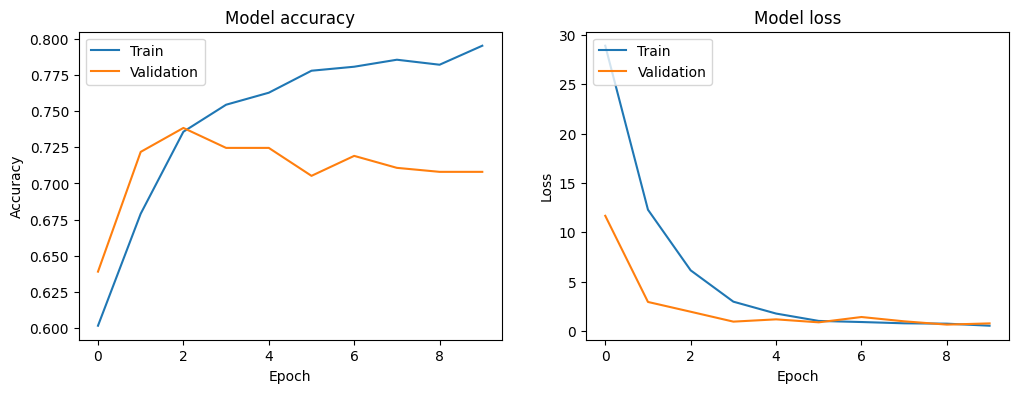

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


12/12 [==============================] - 0s 9ms/step


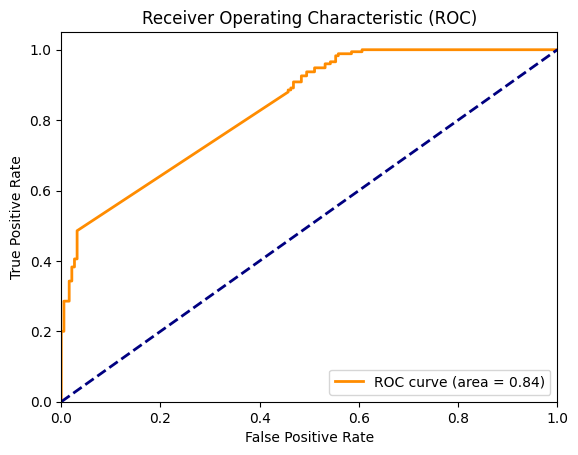

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Predictions for ROC curve and confusion matrix
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

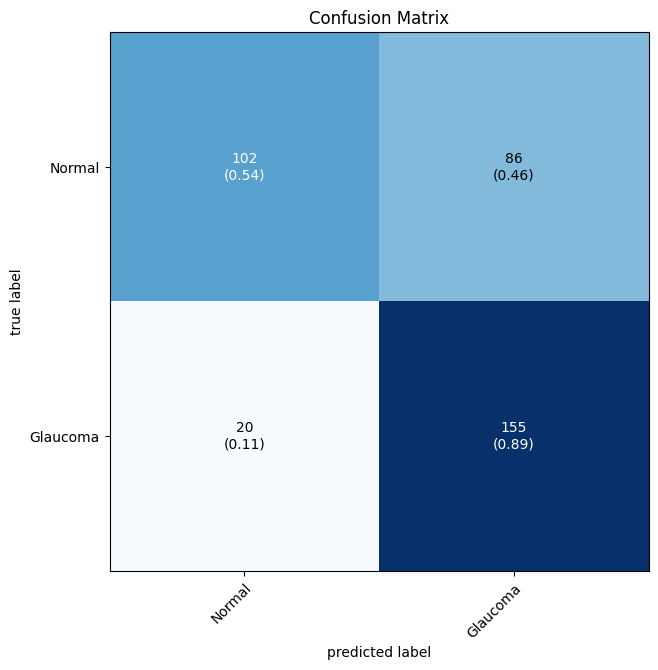

In [ ]:
# Confusion Matrix
def plot_conf_matrix(labels, preds):
  cm = confusion_matrix(labels, preds)
  plot_confusion_matrix(conf_mat=cm, figsize=(8, 7), class_names=["Normal", "Glaucoma"], show_normed=True)
  plt.title("Confusion Matrix")  # Add title here
  plt.show()
plot_conf_matrix(y_val, y_pred)